In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [214]:
X = pd.read_csv('train.csv')
y = X.pop('outcome')

In [215]:
X.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no


In [216]:
y.head()

0          died
1    euthanized
2         lived
3         lived
4         lived
Name: outcome, dtype: object

In [217]:
#filter
categorical_columns = [colm for colm in X.columns if X[colm].dtype == 'object']
numerical_columns = [colm for colm in X.columns if X[colm].dtype in ['int64', 'float64'] ]

In [218]:
categorical_columns

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

In [219]:
numerical_columns

['id',
 'hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [220]:
X[numerical_columns]

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0
1,1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0
3,3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0
4,4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,0,0
1231,1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,0,0
1232,1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,0,0
1233,1233,534784,38.1,70.0,16.0,2.0,58.0,74.0,2.0,2209,0,0


In [221]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [222]:
discrete_features = X[categorical_columns]

In [223]:
discrete_features

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,1,0,2,4,3,3,2,1,4,3,1,2,2,3,1,0
1,1,0,2,3,5,3,4,1,1,1,2,1,2,3,1,0
2,1,0,2,4,6,2,3,4,1,3,3,0,1,3,1,0
3,1,0,1,4,6,3,4,4,1,3,2,2,2,2,1,1
4,0,0,3,3,4,2,1,4,2,3,1,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,2,4,6,3,2,1,1,1,2,0,1,3,1,0
1231,1,0,2,4,5,2,4,4,4,3,3,2,2,3,1,1
1232,1,1,3,4,4,2,4,4,4,3,3,3,3,2,1,1
1233,1,0,3,4,2,2,4,4,4,1,2,1,2,2,1,0


In [224]:
label_encode_y = LabelEncoder()
y['label'] = label_encode_y.fit_transform(y)

In [225]:
Y = pd.DataFrame(y['label'], columns=['outcome'])

In [226]:
Y.head()

,outcome
0,0
1,1
2,2
3,2
4,2


In [227]:
discrete_features.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,1,0,2,4,3,3,2,1,4,3,1,2,2,3,1,0
1,1,0,2,3,5,3,4,1,1,1,2,1,2,3,1,0
2,1,0,2,4,6,2,3,4,1,3,3,0,1,3,1,0
3,1,0,1,4,6,3,4,4,1,3,2,2,2,2,1,1
4,0,0,3,3,4,2,1,4,2,3,1,4,4,2,0,1


In [230]:
X.pop('id')

0          0
1          1
2          2
3          3
4          4
        ... 
1230    1230
1231    1231
1232    1232
1233    1233
1234    1234
Name: id, Length: 1235, dtype: int64

In [231]:
X.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,2,57.0,8.5,3,3.4,1,2209,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,2,33.0,64.0,3,2.0,1,2208,0,0,0
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,1,37.0,6.4,3,3.4,1,5124,0,0,0
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,2,53.0,7.0,2,3.9,1,2208,0,0,1
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,4,47.0,7.3,2,2.6,0,0,0,0,1


In [236]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y, categorical_columns):
    mi_scores = mutual_info_regression(X,y, discrete_features= discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns).sort_values(ascending=False)
    
    return mi_scores


mi_scores = make_mi_scores(X,Y, discrete_features)

print(mi_scores)
print(mi_scores.index)
print(len(mi_scores))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hospital_number          0.852162
pulse                    0.231558
lesion_1                 0.199877
packed_cell_volume       0.170473
pain                     0.147876
abdomo_protein           0.138728
total_protein            0.136980
nasogastric_reflux_ph    0.123880
respiratory_rate         0.105299
mucous_membrane          0.089330
peripheral_pulse         0.077858
surgical_lesion          0.053962
abdomo_appearance        0.051625
capillary_refill_time    0.049071
abdominal_distention     0.045725
peristalsis              0.045594
cp_data                  0.045346
rectal_temp              0.045305
rectal_exam_feces        0.041539
temp_of_extremities      0.041199
abdomen                  0.029630
age                      0.019382
nasogastric_tube         0.016337
nasogastric_reflux       0.012383
surgery                  0.007221
lesion_2                 0.005338
lesion_3                 0.000000
Name: MI Scores, dtype: float64
Index(['hospital_number', 'pulse', 'lesion_1', 'pa

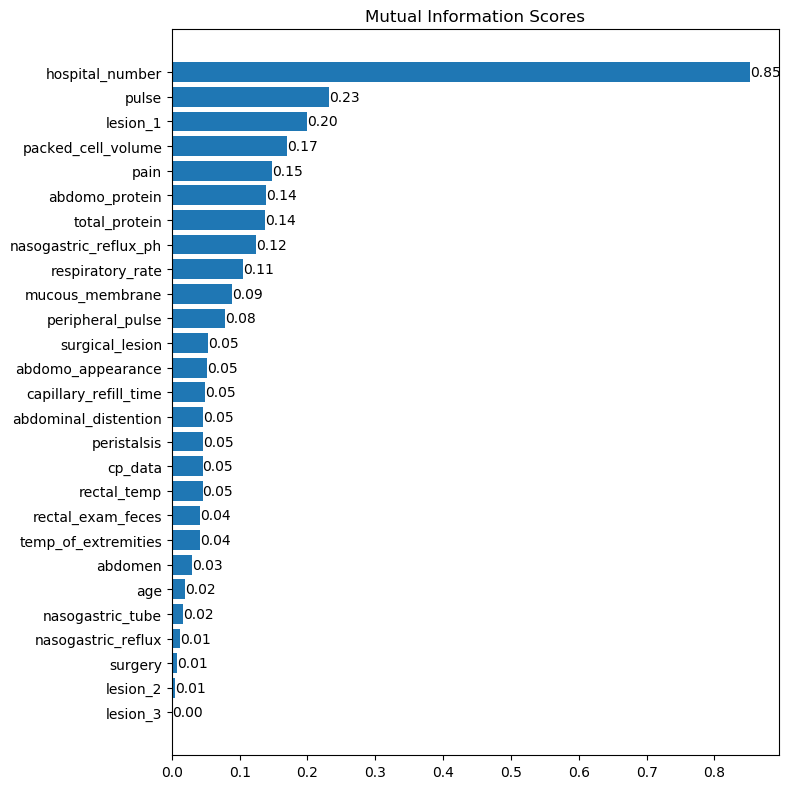

In [240]:
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    # Add the value labels to the bars
    for index, value in enumerate(scores.values):
        plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

    plt.tight_layout()  
    return plt.show()
    
plt.figure(dpi=100, figsize=(8,8))
plot_mi_score(mi_scores)        

In [242]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a sample DataFrame
data = {'outcome': ['A', 'B', 'A', 'C', 'B']}
y = pd.DataFrame(data)

# Use LabelEncoder to encode the 'outcome' column
label_encode_y = LabelEncoder()
y['label'] = label_encode_y.fit_transform(y['outcome'])

# Get the list of column names
#column_names = y.columns.to_list()

print(y)


  outcome  label
0       A      0
1       B      1
2       A      0
3       C      2
4       B      1


In [243]:
y.columns.to_list()

['outcome', 'label']